In [8]:
from Batman.batman_monsoon import make_lightcurve, make_batman
from Convolve.convolve import tbconvolve, read_tess, read_batman, open_tess_fits, convolve
from Science.generalized_chisquared import make_table

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Make Batman Parameter File
suffix = '_test'
param_names = ['LIGHTCURVE_TABLE','PARAMETERS_TABLE','LOG_R_MIN','LOG_R_MAX','NUM_R_STEP',
         'LOG_W_MIN','LOG_W_MAX','NUM_W_STEP']
params = ['batmanCurves{}.csv'.format(suffix), 'batmanParams{}.csv'.format(suffix),
          '0', '0', '1', '-1', '3', '20']
paramfile = 'param{}.txt'.format(suffix)
with open(paramfile, 'w') as f:
    f.write('# Batman Parameter File\n')
    for i in range(len(params)):
        f.write(' = '.join([param_names[i], params[i]]) + '\n')
        

In [3]:
# Make batman curves
pb = "/home/ctaiudovicic/projects/tess_batman/code/"
bparams, bcurves = make_batman(paramfile, pb, norm=True, write=True)

Generating curves


/home/ctaiudovicic/projects/tess_batman/code/Batman/batman_monsoon.py:117: RuntimeWarning: invalid value encountered in true_divide
  lc = (lc-lcmin)/(lcmax-lcmin)


Generated 1999 curves in 0.5843029022216797 s
Writing files
Wrote files in 2.1715877056121826 s


In [4]:
# for i in range(500,len(bcurves.colnames)-1500):
#     plt.plot(bcurves['times'], bcurves['curve %d'%i])

Reading TESS from /home/ctaiudovicic/projects/tess_batman/sampleData/sample_Sector0, s:2, e:3...
Reading Batman transit curves...
batmanCurves_test.csv
Starting convolutions...


/home/ctaiudovicic/anaconda3/envs/astro/lib/python3.7/site-packages/mkl_fft/_numpy_fft.py:1044: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfftn_numpy(a, s, axes)


Convolved 2000 curves in 3.3 s


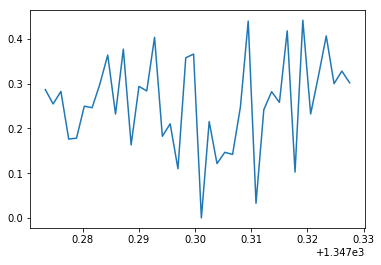

In [15]:
# pt = "/home/ctaiudovicic/projects/tess_batman/data/TESS/"
pt = "/home/ctaiudovicic/projects/tess_batman/sampleData/"
start = 2
end = 3
tess_names = read_tess(pt, pt+"sample_Sector0", start, end)
times, curve_names, batmanCurves = read_batman(pb, suffix)
tess_time, tess_flux = open_tess_fits(tess_names[0], norm=True)
curves, times, convs = convolve(tess_time, tess_flux, batmanCurves, curve_names, num_keep=len(curve_names))

plt.plot(tess_time, tess_flux)


# candidates = tbconvolve(pt, pb, suffix, 0, start, end, pb, num_keep = -1, norm_tess=True, write=False)


7172


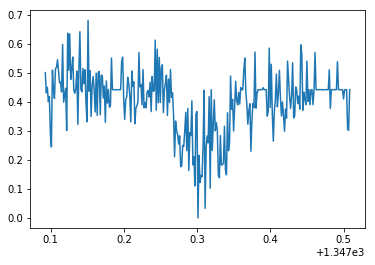

In [40]:
import matplotlib.pyplot as plt
print(np.argmin(tess_flux[:15700]))
# plt.plot(tess_time, tess_flux)
# plt.plot(tess_time[11400:11600], tess_flux[11400:11600])
plt.plot(tess_time[15842-150:15842+150], tess_flux[15842-150:15842+150])
# plt.plot(tess_time[11400:16000], tess_flux[11400:16000])

In [6]:
import matplotlib.colors as c
start = 0
stop = 2000
step = 100

fig = plt.figure()
cm = c.LinearSegmentedColormap.from_list('mycolors',['blue','red'])
# make colorbar
cmin = int(np.nanmin(candidates['correlation'][start:stop]))
cmax = int(np.nanmax(candidates['correlation'][start:stop]))
print(cmin, cmax)
step = (cmax-cmin)//2
if step < 1:
    step = 1
Z = [[0,0],[0,0]]
levels = range(cmin,cmax+step,step)
CS3 = plt.contourf(Z, levels, cmap=cm)
plt.clf()

for i in range(start, stop, step):#, len(candidates)):
    r = (candidates[i]['correlation']-cmin)/(cmax-cmin)
    if r > 1:
        r = 1
    curve = i % 1999
    plt.plot(bcurves['times'], bcurves['curve %d'%curve], color=(r, 0, 1-r))
plt.colorbar(CS3)

NameError: name 'candidates' is not defined

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot()